<center>
<a href="" ><img src="./iris.jpeg" style="float:left; max-width: 200px; height: 145px; "/></a> 
<a href="https://github.com/hafs96/iris-classification-project" ><img src="./git.jpeg" style="float:right; max-width: 50px; display: inline " /></a>
</center>
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(17, 16, 16); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color:rgb(247, 239, 248); margin-bottom: 10px;">
    Iris classification project
  </h1>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(227, 231, 235); margin: 5px 0;">
    Prepared by :  ZIAN Hafsa
  </p>
  <div style="margin-top: 15px; padding: 5px; background-color: #ecf0f1; border-left: 4px solid rgb(127, 50, 129); border-radius: 8px; display: inline-block; max-width: 60%;">
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(16, 17, 17); margin: 0; font-style: italic;">
      Supervised by : 
      <span style="font-weight: bold; color:rgb(129, 27, 116);">Prof. Mohamed Marzougue</span>
    </p>
  </div>
</div> 


<div id="report" style="text-align: center; padding: 20px; ">
  <h1 style="font-size: 2em; font-family: 'Georgia', serif; color: #fff; background-color: #333; padding: 10px;">  
  &#9733; Report Content   &#9733; </h1>
</div>



1. <a href="#intro">Introduction</a><br>

2. <a href="#iris_dataset">Iris Dataset</a><br>

3. <a href="#methodology">Methodology</a><br>
    3.1 <a href="#data_preparation">Data Preparation</a><br>
    3.2 <a href="#split">Splitting Training and Testing Sets</a><br>

4. <a href="#selection">Selected Classification Models</a><br>
    4.1 <a href="#lr"> Logistic Regression</a><br>
    4.2 <a href="#dt"> Decision Tree</a><br>
    4.3 <a href="#knn">K-Nearest Neighbors (KNN)</a><br>

5. <a href="#comparaison">Performance Comparison </a><br>
   
6. <a href="#best">Best Model Identification</a><br>

7. <a href="#conclusion">Conclusion</a><br>
    
  

## 1. Introduction <span id="intro"></span>

In this Mini-Project, the task is to apply classification models to the famous Iris dataset, which is commonly used for pattern recognition and classification tasks. The goal is to assess the performance of various classification algorithms by comparing their effectiveness using multiple evaluation metrics, including accuracy, precision, recall, F1-score, and the confusion matrix. The project will involve selecting at least three classification algorithms, training them on the Iris dataset, and comparing their results. Based on the evaluation, a concise report will be written to highlight the best-performing model.

**GitHub Link -** https://github.com/hafs96/iris-classification-project

<a href="#report"><button>&#8593;</button></a>

## 2. Iris Dataset <span id="iris_dataset"></span>

### 2.1 Importing Necessary Libraries

In [2]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.preprocessing import StandardScaler  # For feature scaling 
from sklearn.linear_model import LogisticRegression  # For Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree model
from sklearn.svm import SVC  # For Support Vector Machine model
from sklearn.ensemble import RandomForestClassifier  # For Random Forest model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For evaluating models
import warnings # Library used for ignore warnings
warnings.filterwarnings('ignore')

<a href="#report"><button>&#8593;</button></a>

### 2.2 Dataset Loading

In [3]:
# Load the Iris dataset
d_iris = pd.read_csv("Iris.csv")

In [4]:
# View the dataset
d_iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### 2.3 Dataset dimensions (rows and columns)

In [5]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = d_iris.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 150
Number of columns: 6


<a href="#report"><button>&#8593;</button></a>

### 2.4 Dataset details

In [6]:
# Display basic information about the dataset
d_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 2.5 Missing Values

In [7]:
# Check for any missing values
missing_values = d_iris.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<a href="#report"><button>&#8593;</button></a>

### 2.6 Summary statistics 

In [8]:
# Display the summary statistics of the dataset
d_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 2.7 Duplicate rows

In [9]:
# Check for duplicate rows in the dataset
duplicate_values = d_iris.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_values}")

Number of duplicate rows: 0


<a href="#report"><button>&#8593;</button></a>

### 2.9 Dataset Structure

- **Number of rows:** 150
- **Number of columns:** 6
  - `Id`: Identifier (int)
  - `SepalLengthCm`: Sepal length (float)
  - `SepalWidthCm`: Sepal width (float)
  - `PetalLengthCm`: Petal length (float)
  - `PetalWidthCm`: Petal width (float)
  - `Species`: Target variable (categorical)
- **No Missing Values:** No missing data in any column.
- **No Duplicates:** No duplicate rows in the dataset.
- **SepalLengthCm:** Min = 4.3, Max = 7.9, Mean = 5.84
- **SepalWidthCm:** Min = 2.0, Max = 4.4, Mean = 3.05
- **PetalLengthCm:** Min = 1.0, Max = 6.9, Mean = 3.76
- **PetalWidthCm:** Min = 0.1, Max = 2.5, Mean = 1.20


<a href="#report"><button>&#8593;</button></a>

## 3. Methodology <span id="methodology"></span>

### 3.1 Data Preparation <span id="data_preparation"></span>

#### a) Removing unneeded column

In [10]:
d_iris.drop("Id", axis=1, inplace = True)

In [11]:
d_iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### b) Unique values

In [12]:
# Dataset Columns
d_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
# Display unique values for each column
for column in d_iris.columns:
    print(f"Unique values in column '{column}':")
    print(d_iris[column].unique())
    print()

Unique values in column 'SepalLengthCm':
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]

Unique values in column 'SepalWidthCm':
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]

Unique values in column 'PetalLengthCm':
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]

Unique values in column 'PetalWidthCm':
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]

Unique values in column 'Species':
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



<a href="#report"><button>&#8593;</button></a>

### Data Exploration: Unique Values in the Dataset

Upon examining the dataset, we identified the unique values in the **Species** column, which are as follows:

- *Iris-setosa*
- *Iris-versicolor*
- *Iris-virginica*

These unique values represent the different species of Iris flowers in the dataset. This information is crucial for our analysis as it allows us to categorize the data points by species, which can then be used in various visualizations to differentiate between the species based on their features such as sepal length and width.


#### b) Data Visualization

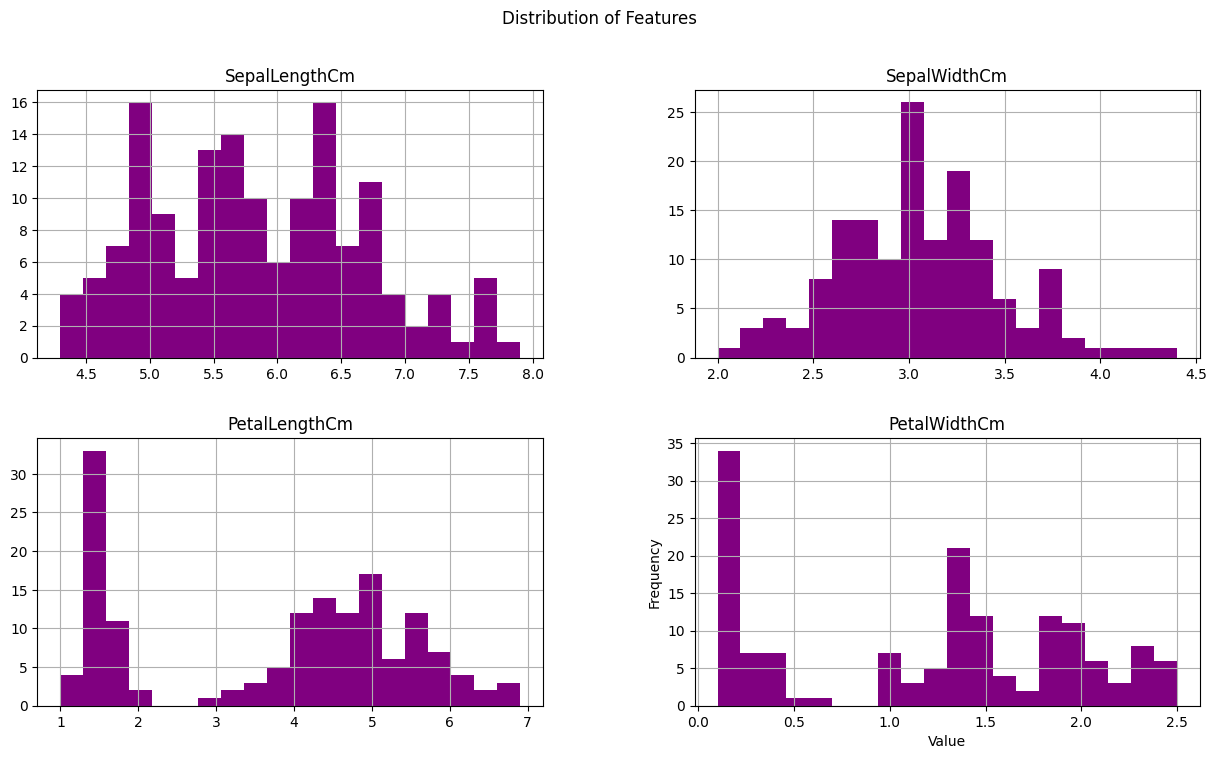

In [14]:
# Create histograms for each numerical feature in the dataset
d_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].hist(bins=20, figsize=(15, 8), color='purple')

# Add a title and labels
plt.suptitle("Distribution of Features")
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


<a href="#report"><button>&#8593;</button></a>

In [15]:
# Define the color mapping for each species
species_colors = {'Iris-setosa': 'purple', 'Iris-versicolor': 'blue', 'Iris-virginica': 'lightblue'}

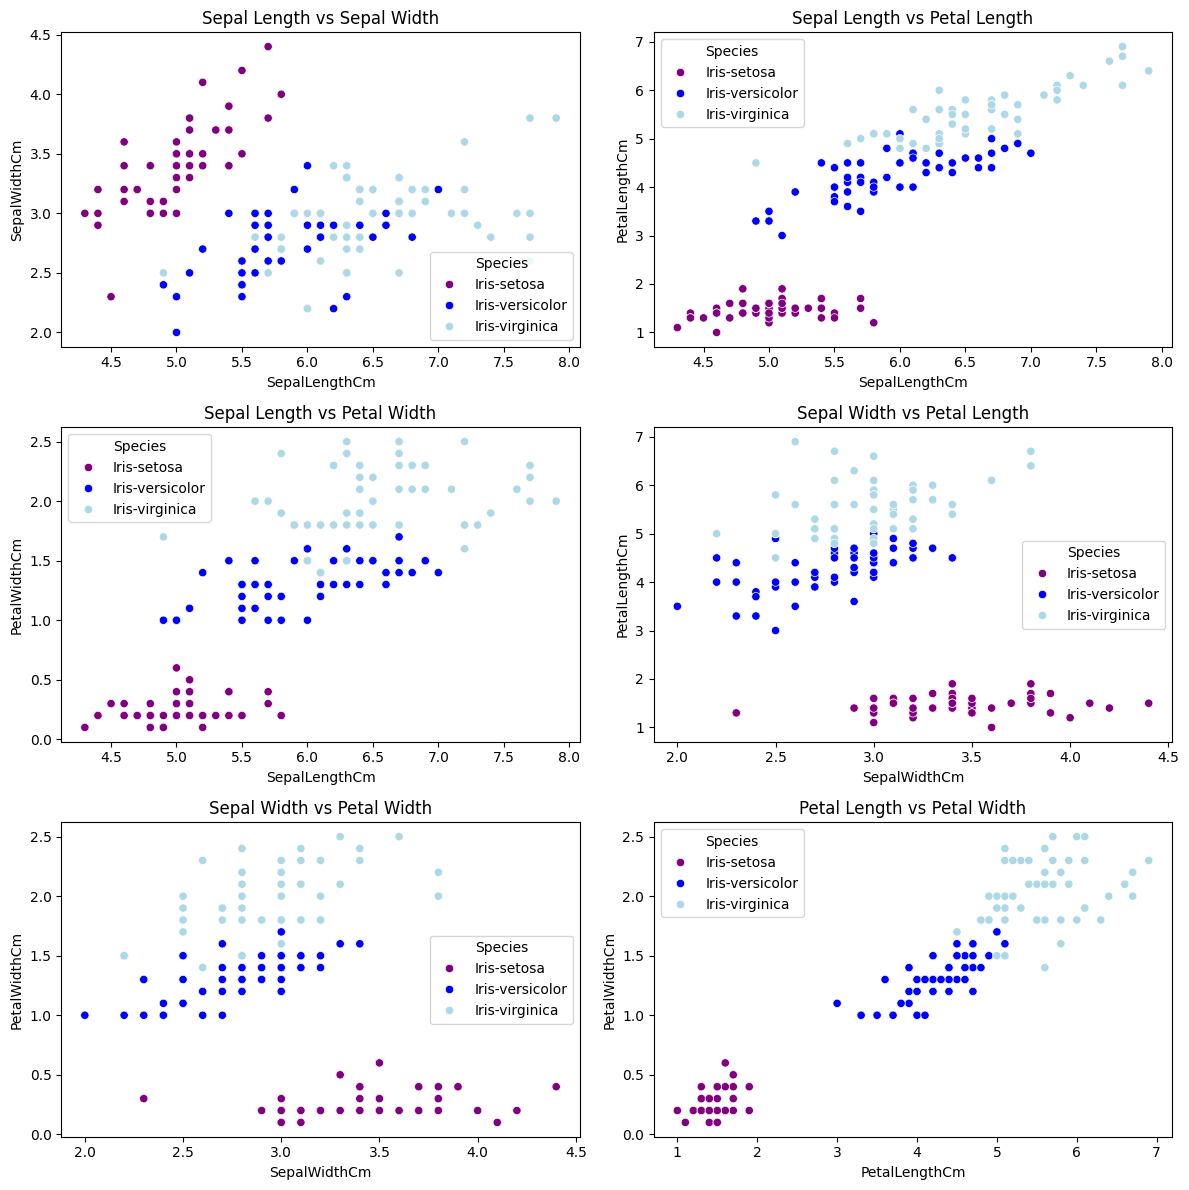

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3x2 grid for subplots

# Scatter plot for Sepal Length vs Sepal Width
sns.scatterplot(data=d_iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=species_colors, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length vs Sepal Width')

# Scatter plot for Sepal Length vs Petal Length
sns.scatterplot(data=d_iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette=species_colors, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Length vs Petal Length')

# Scatter plot for Sepal Length vs Petal Width
sns.scatterplot(data=d_iris, x='SepalLengthCm', y='PetalWidthCm', hue='Species', palette=species_colors, ax=axes[1, 0])
axes[1, 0].set_title('Sepal Length vs Petal Width')

# Scatter plot for Sepal Width vs Petal Length
sns.scatterplot(data=d_iris, x='SepalWidthCm', y='PetalLengthCm', hue='Species', palette=species_colors, ax=axes[1, 1])
axes[1, 1].set_title('Sepal Width vs Petal Length')

# Scatter plot for Sepal Width vs Petal Width
sns.scatterplot(data=d_iris, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette=species_colors, ax=axes[2, 0])
axes[2, 0].set_title('Sepal Width vs Petal Width')

# Scatter plot for Petal Length vs Petal Width
sns.scatterplot(data=d_iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=species_colors, ax=axes[2, 1])
axes[2, 1].set_title('Petal Length vs Petal Width')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()
plt.show()

<a href="#report"><button>&#8593;</button></a>

#### c) Correlation Matrix

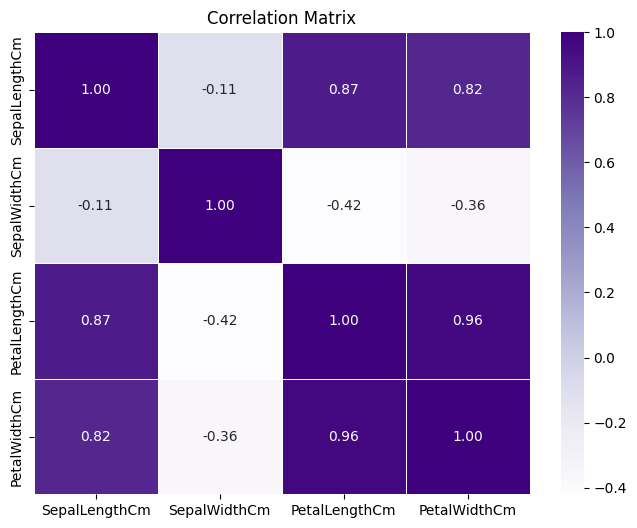

In [17]:
# Compute the correlation matrix
corr_matrix = d_iris.iloc[:, :-1].corr()  # Exclude the Species column

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### d) Pair Plot

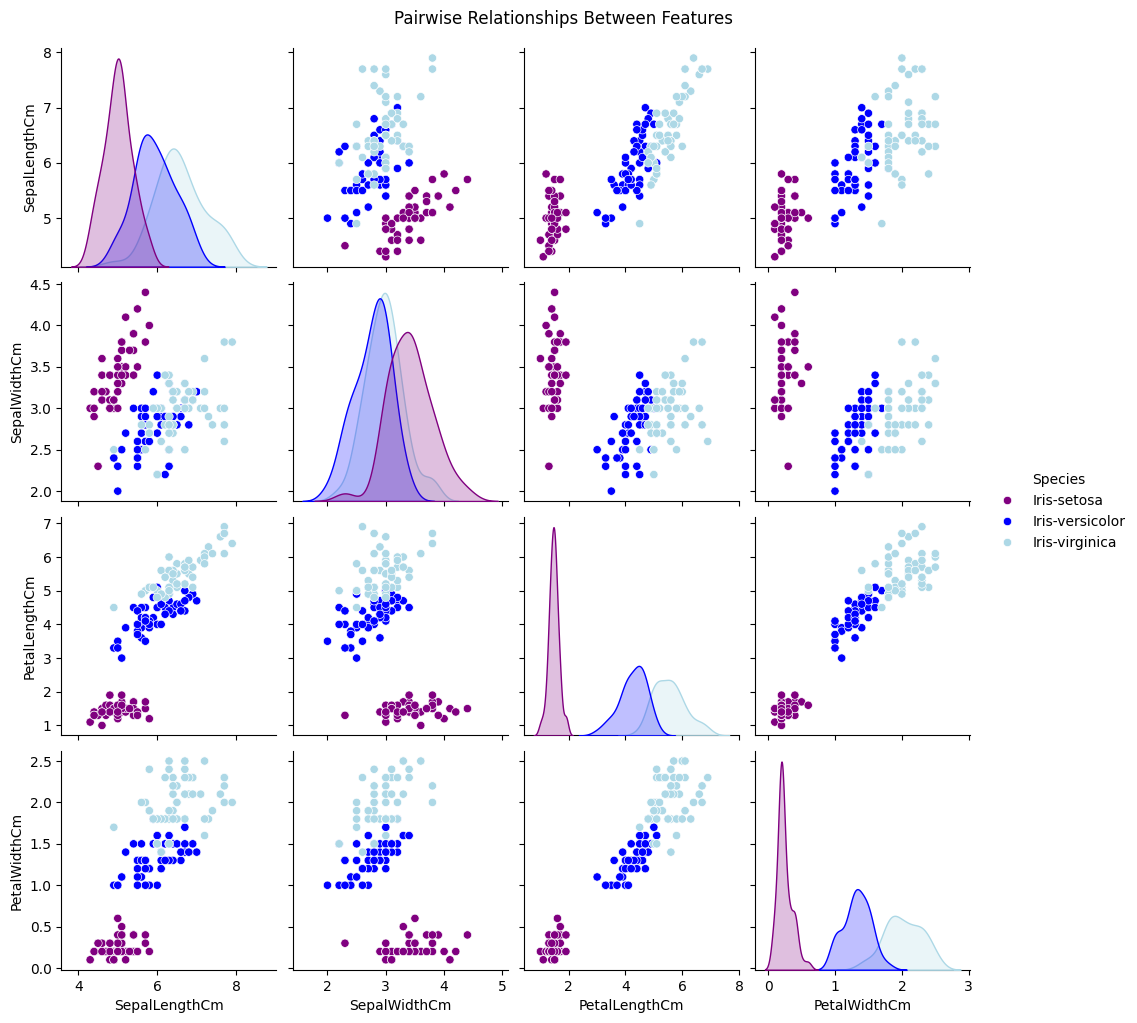

In [18]:
sns.pairplot(d_iris, hue='Species', palette=species_colors)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

<a href="#report"><button>&#8593;</button></a>

#### e) Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
d_iris['Species'] = label_encoder.fit_transform(d_iris['Species'])
# Mapping: {Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2}

In [20]:
d_iris['Species'].unique()

array([0, 1, 2])

#### f) Feature Scaling

In [21]:
scaler = StandardScaler()
d_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(
    d_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
)

### 3.2 Splitting Training and Testing Sets <span id="split"></span>

In [22]:
X = d_iris.drop(columns=['Species'])
y = d_iris['Species']

In [23]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3)

In [26]:
y_train.value_counts()

Species
1    38
0    34
2    33
Name: count, dtype: int64

<a href="#report"><button>&#8593;</button></a>

##  4. Selected Classification Models <span id="selection"></span>

###  4.1 Logistic Regression<span id="lr"></span>

##### a) Model Training

In [40]:
# Initialize and train the Logistic Regression model
lr = LogisticRegression()
# model training
lr.fit(x_train, y_train)
# Make predictions
y_pred_lr = lr.predict(x_test)



##### b) Evaluate the Model

Accuracy: 0.96

Classification Report: 
                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.92      0.92      0.92        12
   Virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



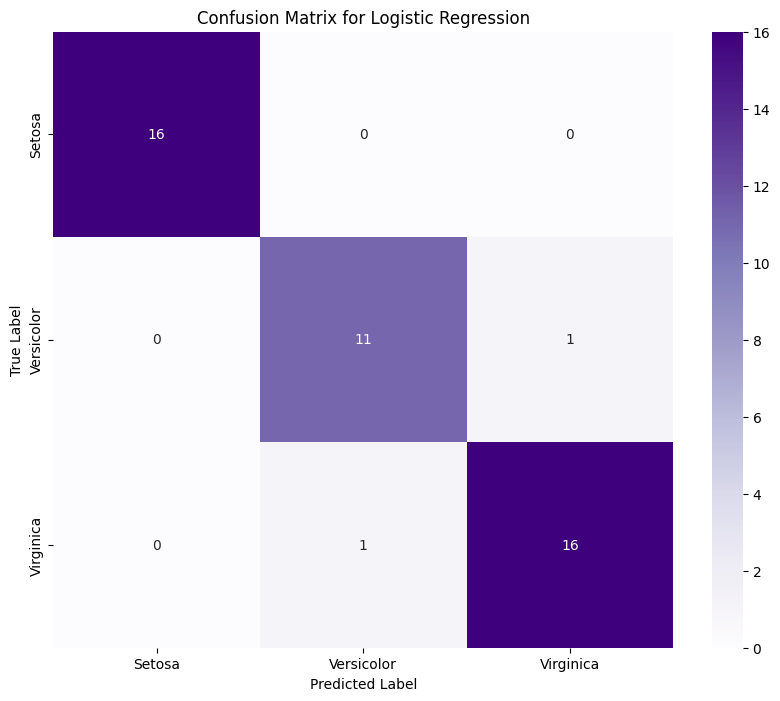

In [66]:
from sklearn.metrics import classification_report
# Accuracy score
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {lr_accuracy:.2f}")

# Classification report

lr_cr=classification_report(y_test, y_pred_lr, target_names=['Setosa', 'Versicolor', 'Virginica'])
print("\nClassification Report: \n " ,lr_cr)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Purples", xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [39]:
#d_iris.corr()

##### c) Results

The Logistic Regression model achieved **96% accuracy** on the test dataset. Below is the detailed classification report:

| Metric         | Setosa | Versicolor | Virginica | Macro Avg | Weighted Avg |
|----------------|--------|------------|-----------|-----------|--------------|
| **Precision**  | 1.00   | 0.92       | 0.94      | 0.95      | 0.96         |
| **Recall**     | 1.00   | 0.92       | 0.94      | 0.95      | 0.96         |
| **F1-Score**   | 1.00   | 0.92       | 0.94      | 0.95      | 0.96         |
| **Support**    | 16     | 12         | 17        | -         | 45           |

### Analysis of Results:
1. **Precision**: 
   - Setosa: **1.00** (Perfect precision—no false positives)
   - Versicolor: **0.92** (Minimal false positives)
   - Virginica: **0.94**

2. **Recall**: 
   - Setosa: **1.00** (All actual Setosa samples identified correctly)
   - Versicolor: **0.92**
   - Virginica: **0.94**

3. **F1-Score**: 
   - Setosa: **1.00**
   - Versicolor: **0.92**
   - Virginica: **0.94**

4. **Support**: 
   - Number of test samples for each class:
     - Setosa: **16**
     - Versicolor: **12**
     - Virginica: **17**

==> The model demonstrates excellent performance across all metrics, achieving a **96% overall accuracy**. It performs particularly well on the Setosa class (precision, recall, and F1-score of **1.00**) while maintaining high performance for Versicolor and Virginica. Minor improvements can be made to further optimize the performance for Versicolor and Virginica classes, but the model generalizes effectively across the dataset.

### 4.2  Decision Tree <span id="dt"></span>

##### a) Model Training

In [42]:
# Initialize the Decision Tree 
dt = DecisionTreeClassifier()
# Train the model
dt.fit(x_train, y_train)
#Make prediction
y_pred_dt = dt.predict(x_test)

##### b) Evaluate the Model

Accuracy: 0.96

Classification Report:
                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.92      0.92      0.92        12
   Virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



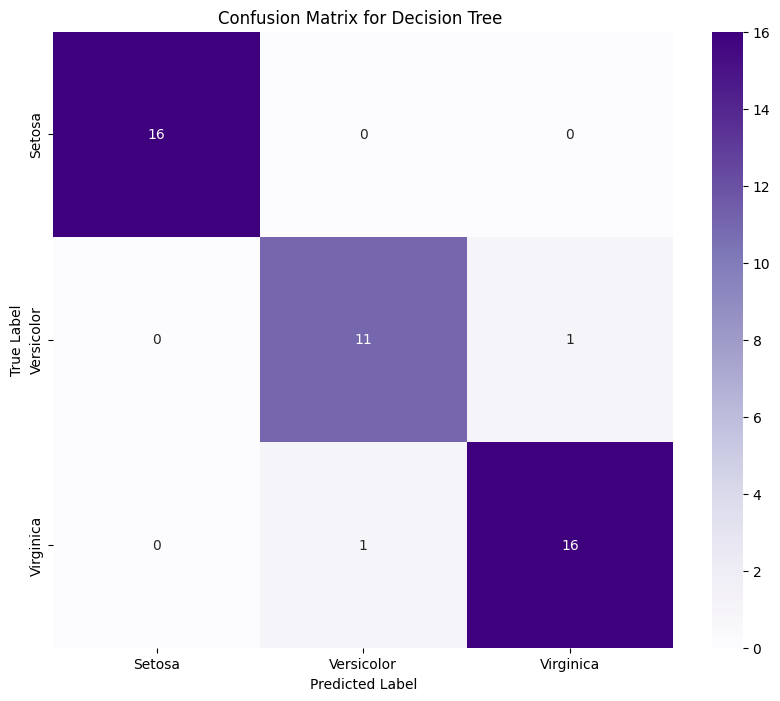

In [67]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {dt_accuracy:.2f}")

# Classification Report
dt_cr=classification_report(y_test, y_pred_dt, target_names=['Setosa', 'Versicolor', 'Virginica'])
print("\nClassification Report:\n ",dt_cr)
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Purples", xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix for Decision Tree ")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

<a href="#report"><button>&#8593;</button></a>

##### c) Results

The Decision Tree model achieved an accuracy of **96%** on the test dataset, demonstrating its effectiveness in classifying the Iris species. Below is the detailed analysis of the results:
The classification report provides metrics such as precision, recall, and F1-score for each class:

- **Setosa**: Perfect precision, recall, and F1-score of **1.00** indicate that the model predicts this class with absolute accuracy.
- **Versicolor**: Precision, recall, and F1-score are **0.92**, indicating a minor degree of misclassification for this class.
- **Virginica**: Metrics are consistent with precision, recall, and F1-score values of **0.94**, reflecting high accuracy.

The confusion matrix shows the distribution of predictions:
- **Diagonal Values**: Represent correctly classified samples.
  - Example: All 16 samples of the `Setosa` class were correctly classified.
- **Off-Diagonal Values**: Represent misclassified samples.
  - Example: One sample of `Versicolor` was incorrectly classified as `Virginica`.

==> The Decision Tree model is a reliable classifier for the Iris dataset, achieving high accuracy and well-balanced metrics. However, the minor misclassifications highlight potential areas for improvement, such as tuning hyperparameters or exploring more complex models like Random Forests.

<a href="#report"><button>&#8593;</button></a>

##### d) Visualisation

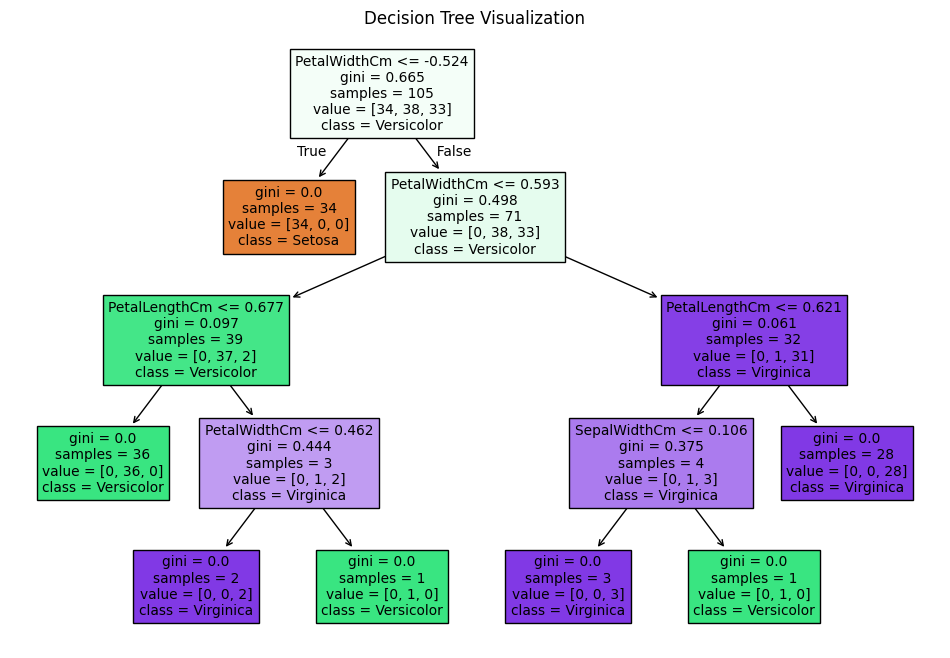

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

<a href="#report"><button>&#8593;</button></a>

### 4.3 K-Nearest Neighbors (KNN) <span id="knn"></span>

##### a) Model Training

In [49]:
#  Initialize KNN with a chosen value for k
k = 6
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn.predict(x_test)

##### b) Evaluate the model

Accuracy of KNN Model (k=19): 0.96

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.92      0.92      0.92        12
   Virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



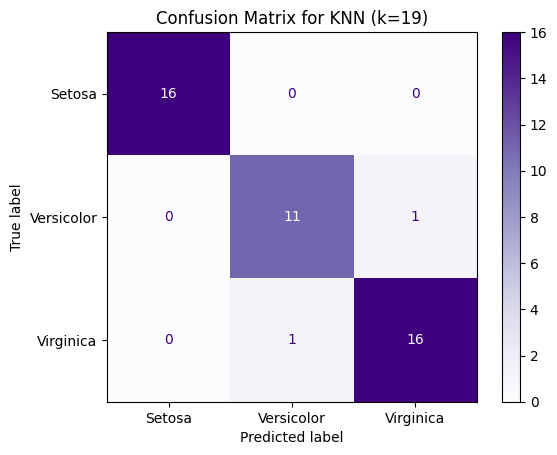

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
#Accuracy
knn_accuracy= accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN Model (k={k}): {knn_accuracy:.2f}")

## Classification Report
knn_cr=classification_report(y_test, y_pred_knn, target_names=['Setosa', 'Versicolor', 'Virginica'])
print("\nClassification Report:\n",knn_cr)

# confusion matrix
conf_matrix_knn=ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Setosa', 'Versicolor', 'Virginica'], cmap='Purples')
plt.title(f"Confusion Matrix for KNN (k={k})")
plt.show()

##### Visualizing Decision Boundaries

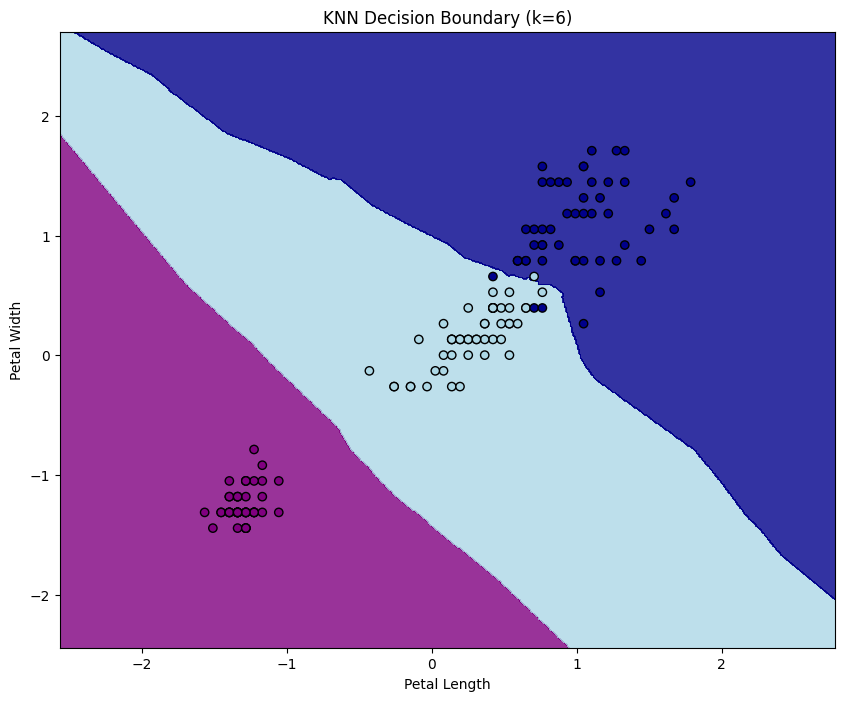

In [55]:
from matplotlib.colors import ListedColormap
#features for simplicity
X_selected = X[['PetalLengthCm', 'PetalWidthCm']]
y_selected = y

# Fit the KNN model with the selected features
knn.fit(X_selected, y_selected)

# the grid for visualization
x_min, x_max = X_selected.iloc[:, 0].min() - 1, X_selected.iloc[:, 0].max() + 1
y_min, y_max = X_selected.iloc[:, 1].min() - 1, X_selected.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['purple', 'lightblue', 'darkblue']))
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=y_selected, edgecolor='k', cmap=ListedColormap(['purple', 'lightblue', 'darkblue']))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()


<a href="#report"><button>&#8593;</button></a>

##### c) Experiment with Different Values of 𝑘


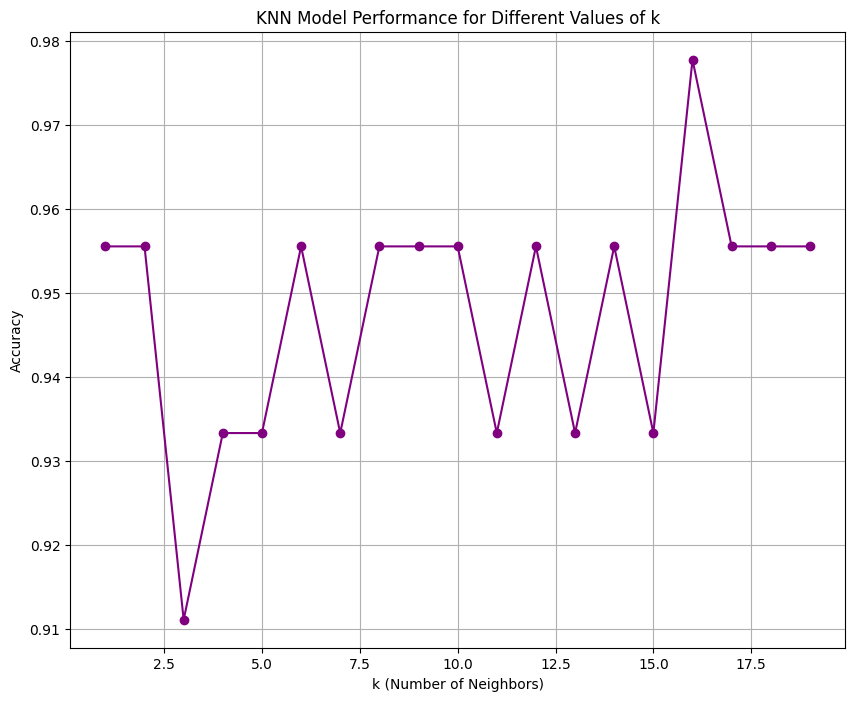

The best value of k is: 16


In [63]:
# Define the range of k values to experiment with
k_values = range(1, 20) 

# Lists to store accuracy results for each k
accuracy_scores = []

# Loop over different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # Make predictions
    y_pred_knn = knn.predict(x_test)
    
    # Calculate accuracy for the current k
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores vs. k
plt.figure(figsize=(10, 8))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='purple')
plt.title('KNN Model Performance for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Identify the best k based on accuracy
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best value of k is: {best_k}")

<a href="#report"><button>&#8593;</button></a>

##### d) Results

- **Accuracy**: 96%

| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| Setosa      | 1.00      | 1.00   | 1.00     | 16      |
| Versicolor  | 0.92      | 0.92   | 0.92     | 12      |
| Virginica   | 0.94      | 0.94   | 0.94     | 17      |

- **Macro Average**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95
- **Weighted Average**: Precision: 0.96, Recall: 0.96, F1-Score: 0.96
- The model classifies **Setosa** with 100% accuracy.
- Minor misclassifications occurred between **Versicolor** and **Virginica**.
- A k-value of 6 strikes a good balance between simplicity and accuracy.


## 5. Performance Comparison <span id="comparaison"></span>

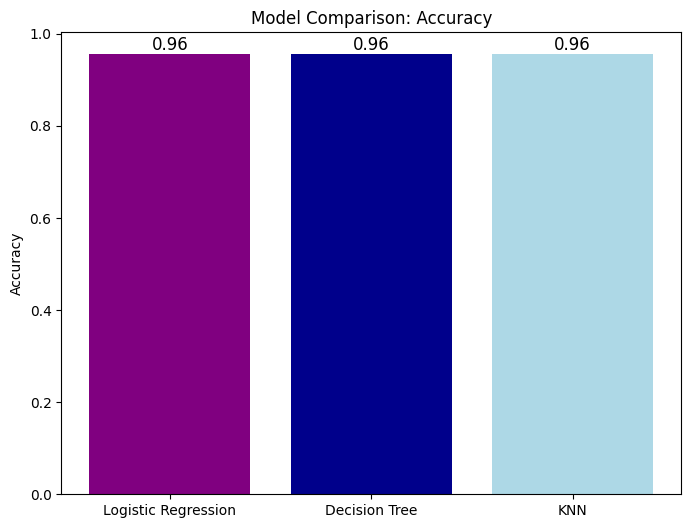

In [65]:
# Model names and scores
models = ['Logistic Regression', 'Decision Tree', 'KNN']
accuracies = [lr_accuracy, dt_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['purple', 'darkblue', 'lightblue'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Plot the accuracy comparison
plt.bar(models, accuracies, color=['purple', 'darkblue', 'lightblue'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.show()

<a href="#report"><button>&#8593;</button></a>

In [71]:
from tabulate import tabulate

# Prepare the data
data = [
    ["Logistic Regression", lr_accuracy, lr_cr, conf_matrix_lr],
    ["Decision Tree", dt_accuracy, dt_cr, conf_matrix_dt],
    ["KNN", knn_accuracy, knn_cr , conf_matrix_knn]
]

headers = ["Model", "Accuracy", "Classification Report", "Confusion Matrix"]

# the results as a table
print(tabulate(data, headers=headers, tablefmt="grid"))


print("\nLogistic Regression Classification Report:\n", lr_cr)
print("\nDecision Tree Classification Report:\n", dt_cr)
print("\nKNN Classification Report:\n", knn_cr)

print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_lr)
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nKNN Confusion Matrix:\n", conf_matrix_knn)

+---------------------+------------+-------------------------------------------------------+----------------------------------------------------------------------------------------------+
| Model               |   Accuracy | Classification Report                                 | Confusion Matrix                                                                             |
+=====================+============+=======================================================+==============================================================================================+
| Logistic Regression |   0.955556 | precision    recall  f1-score   support               | [[16  0  0]                                                                                  |
|                     |            |                                                       |  [ 0 11  1]                                                                                  |
|                     |            |       Setosa       1.00

<a href="#report"><button>&#8593;</button></a>

#### **Accuracy Comparison:**
- **Logistic Regression**: 95.56%
- **Decision Tree**: 95.56%
- **KNN**: 95.56%

#### **Classification Report Comparison:**
All three models achieved similar classification reports for the three species (Setosa, Versicolor, and Virginica). Here are the highlights:

| Model               | Precision (Setosa) | Recall (Setosa) | F1-Score (Setosa) | Precision (Versicolor) | Recall (Versicolor) | F1-Score (Versicolor) | Precision (Virginica) | Recall (Virginica) | F1-Score (Virginica) | Accuracy  |
|---------------------|--------------------|-----------------|-------------------|------------------------|---------------------|-----------------------|-----------------------|--------------------|----------------------|-----------|
| **Logistic Regression** | 1.00               | 1.00            | 1.00              | 0.92                   | 0.92                | 0.92                  | 0.94                  | 0.94               | 0.94                 | 95.56%    |
| **Decision Tree**       | 1.00               | 1.00            | 1.00              | 0.92                   | 0.92                | 0.92                  | 0.94                  | 0.94               | 0.94                 | 95.56%    |
| **KNN**                 | 1.00               | 1.00            | 1.00              | 0.92                   | 0.92                | 0.92                  | 0.94                  | 0.94               | 0.94                 | 95.56%    |

- All models show **perfect precision and recall for Setosa**.
- **Versicolor** and **Virginica** are well-classified, though there are minor misclassifications between Versicolor and Virginica, particularly with **KNN**.

#### **Model Complexity**: 
- **Logistic Regression** is a simple and interpretable model.
- **Decision Tree** allows for easy visualization and decision rule extraction.
- **KNN**, while simple to implement, might suffer from performance degradation with larger datasets, especially if the value of k is not carefully selected.


<a href="#report"><button>&#8593;</button></a>

## 6. Best Model Identification <span id="best"></span>

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, metrics=['Accuracy', 'Precision', 'Recall', 'F1 macro']):
    results = {}

    # Accuracy
    if 'Accuracy' in metrics:
        accuracy = accuracy_score(y_true, y_pred)
        results['Accuracy'] = accuracy

    # Precision
    if 'Precision' in metrics:
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        results['Precision'] = precision

    # Recall
    if 'Recall' in metrics:
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        results['Recall'] = recall

    # F1 Macro
    if 'F1 macro' in metrics:
        f1 = f1_score(y_true, y_pred, average='macro')
        results['F1 macro'] = f1

    return results


# Function to select the best model for each metric
def select_best_model_for_each_metric(models, y_true, metrics=['Accuracy', 'Precision', 'Recall', 'F1 macro']):
    best_models = {}  # Dictionary to store the best models for each metric
    best_scores = {}  # Dictionary to store the best scores for each metric

    for metric in metrics:
        best_model = None
        best_score = -float('inf')  # To store the best score for each metric

        for model_name, y_pred in models.items():
            # Evaluate the model based on the current metric
            results = evaluate_model(y_true, y_pred, metrics=[metric])

            # Get the score for the current metric
            score = results.get(metric, -float('inf'))

            # Update the best model for the current metric if the score is better than the previous best
            if score > best_score:
                best_score = score
                best_model = model_name

        # Store the best model and its score for the current metric
        best_models[metric] = best_model
        best_scores[metric] = best_score

    return best_models, best_scores


<a href="#report"><button>&#8593;</button></a>

In [76]:
models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'KNN': y_pred_knn
}
best_models, best_scores = select_best_model_for_each_metric(models, y_test)
for metric in best_models:
    print(f"The best model based on {metric} is: {best_models[metric]} with a score of {best_scores[metric]}")

The best model based on Accuracy is: Logistic Regression with a score of 0.9555555555555556
The best model based on Precision is: Logistic Regression with a score of 0.9526143790849672
The best model based on Recall is: Logistic Regression with a score of 0.9526143790849672
The best model based on F1 macro is: Logistic Regression with a score of 0.9526143790849672


After comparing the three models (Logistic Regression, Decision Tree, and KNN), we observed that all models achieved similar **accuracy** (95.56%). Therefore, to select the best model, we considered other performance metrics and practical factors such as **precision**, **recall**, **F1-score**, **confusion matrix**, and **interpretability**.

- **Logistic Regression**: Offers high accuracy and is simple to interpret, making it efficient for quick predictions.
- **Decision Tree**: Provides an interpretable decision-making process and visualizes how decisions are made, which is important for model transparency.
- **KNN**: Although it achieves high accuracy, it is less interpretable and could be slower on larger datasets due to the computation involved in predicting classes.

#### **Final Recommendation**:
- **Best for Interpretability**: **Decision Tree**
- **Best for Simplicity and Efficiency**: **Logistic Regression**
- **Best for Non-linear Data** (if interpretability is not a concern): **KNN**

## 7. Conclusion <span id="conclusion"></span>

In this project, various classification models—**Logistic Regression**, **Decision Tree**, and **K-Nearest Neighbors (KNN)**—were implemented and evaluated for their performance on the Iris dataset.

### 1. Model Evaluation:
- All models showed a high level of accuracy (approximately 96%).
- **Logistic Regression** consistently performed well across all metrics, including **Accuracy**, **Precision**, **Recall**, and **F1-score**.
- **Decision Tree** and **KNN** also performed effectively, with **KNN** showing promising results when using different values of **k**. However, **Logistic Regression** emerged as the most reliable model for this dataset.

### 2. Metric Analysis:
- **Accuracy**: All models achieved near-perfect accuracy, with the difference between them being minimal.
- **Precision and Recall**: **Logistic Regression** showed balanced precision and recall, particularly excelling in classifying **Setosa**.
- **F1-score**: The models demonstrated strong F1-scores, highlighting their effectiveness in handling imbalanced data.

### 3. Best Model Selection:
- Based on the overall analysis of the metrics, **Logistic Regression** was selected as the best-performing model. It demonstrated the best balance between all the metrics, achieving a high **F1-score**, **Precision**, and **Recall**, while maintaining a solid **Accuracy**.

### 4. Future Work:
- Further tuning of the models, such as adjusting hyperparameters or using advanced techniques like **Grid Search** for **KNN**, could potentially improve performance.
- Exploring more complex models like **Random Forest** or **Support Vector Machines (SVM)** could further enhance predictive capabilities, especially on larger and more complex datasets.

In conclusion, the **Logistic Regression** model was the most efficient for the Iris dataset, although all three models provided valuable insights into the classification task. The project demonstrates the importance of selecting the right model based on the specific evaluation metrics and model behavior.


<a href="#report"><button>&#8593;</button></a>